In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import f1_score

sys.path.insert(1, os.path.join(sys.path[0], "code/implementation"))
from layer_v2 import Layer
from neural_network_v2 import NeuralNetwork

In [2]:
def visualize_correctness(train, test, title=""):
    # visualizing the data
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.scatter(
        train["x"],
        train["y"],
        c=train["correct"],
        cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
    )
    plt.title("Training Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(1, 2, 2)
    plt.scatter(
        test["x"],
        test["y"],
        c=test["correct"],
        cmap=LinearSegmentedColormap.from_list("rg", ["r", "w", "g"], N=256),
    )
    plt.title("Test Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [3]:
def visualize_data_distribution(train, test, title="", color_by="c"):
    # visualizing the data
    plt.figure(figsize=(10, 5))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.scatter(
        train["x"],
        train["y"],
        c=train[color_by],
        cmap="viridis",
    )
    plt.title("Training Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.subplot(1, 2, 2)
    plt.scatter(
        test["x"],
        test["y"],
        c=test[color_by],
        cmap="viridis",
    )
    plt.title("Test Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Ring (0.75 f-score)

In [39]:
rings_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-training.csv"
)
rings_test = pd.read_csv("https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/rings3-regular-test.csv")
mean = rings_train.mean()
std = rings_train.std()
rings_train[["x", "y"]] = (rings_train[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]
rings_test[["x", "y"]] = (rings_test[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]

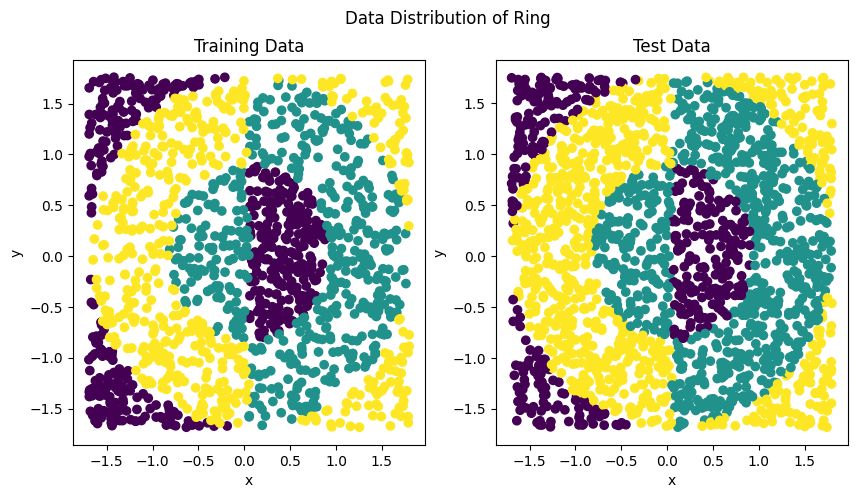

In [40]:
visualize_data_distribution(rings_train, rings_test, "Data Distribution of Ring")

In [41]:
x = rings_train[["x", "y"]].to_numpy()
y = rings_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [42]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 3, "softmax"))

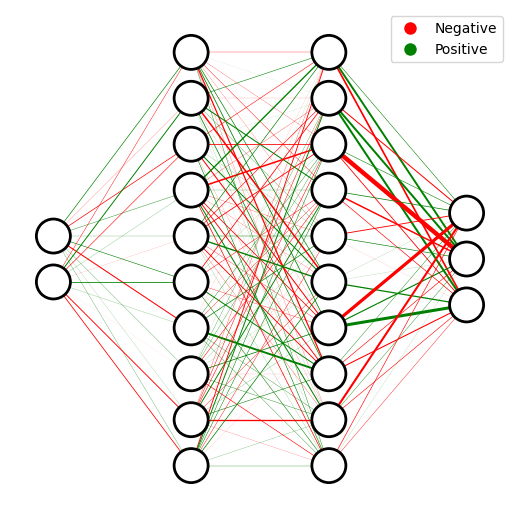

In [43]:
neural.visualize_network()

In [44]:
y_hat = neural.predict(x)
y_hat

array([[0.51723983, 0.24791408, 0.23484609],
       [0.30105815, 0.3086361 , 0.39030575],
       [0.34559108, 0.5279621 , 0.12644683],
       ...,
       [0.38027389, 0.34693893, 0.27278718],
       [0.43714587, 0.29300556, 0.26984857],
       [0.40281158, 0.31563985, 0.28154857]])

In [45]:
neural.predict_class(x)

array([[0],
       [2],
       [1],
       ...,
       [0],
       [0],
       [0]])

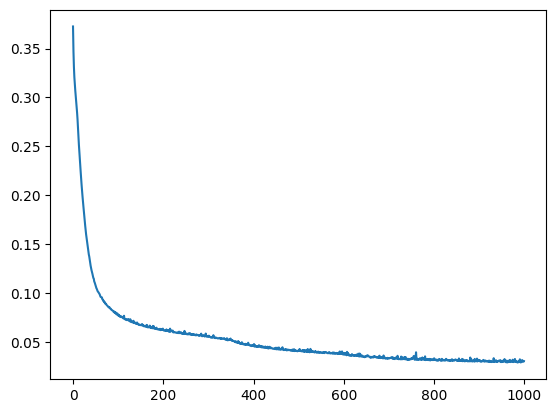

In [46]:
mse = neural.train(x, y, learning_rate=0.001, max_num_epoch=1000)
plt.plot(mse)

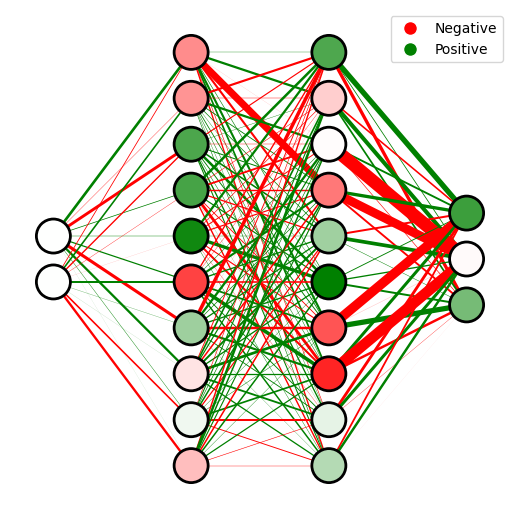

In [47]:
neural.visualize_network()

In [48]:
rings_train["predicted"] = neural.predict_class(x)
rings_train["correct"] = rings_train["c"] == rings_train["predicted"]

rings_test["predicted"] = neural.predict_class(rings_test[["x", "y"]].to_numpy())
rings_test["correct"] = rings_test["c"] == rings_test["predicted"]

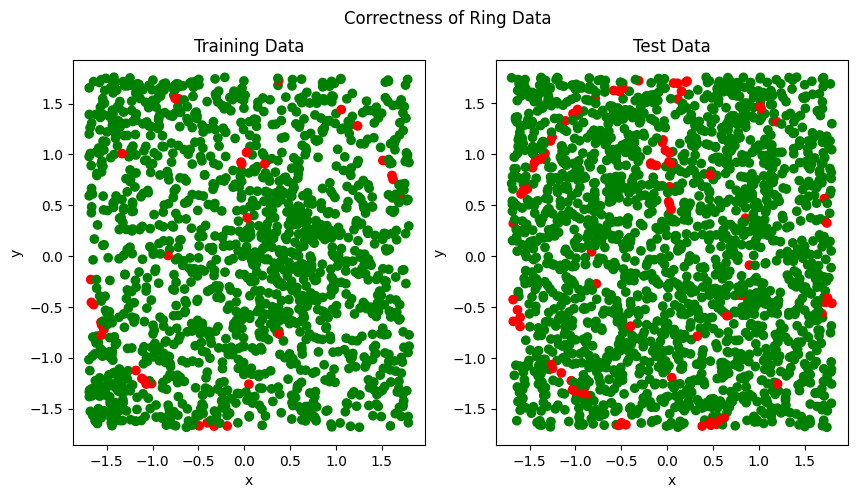

In [49]:
visualize_correctness(rings_train, rings_test, "Correctness of Ring Data")

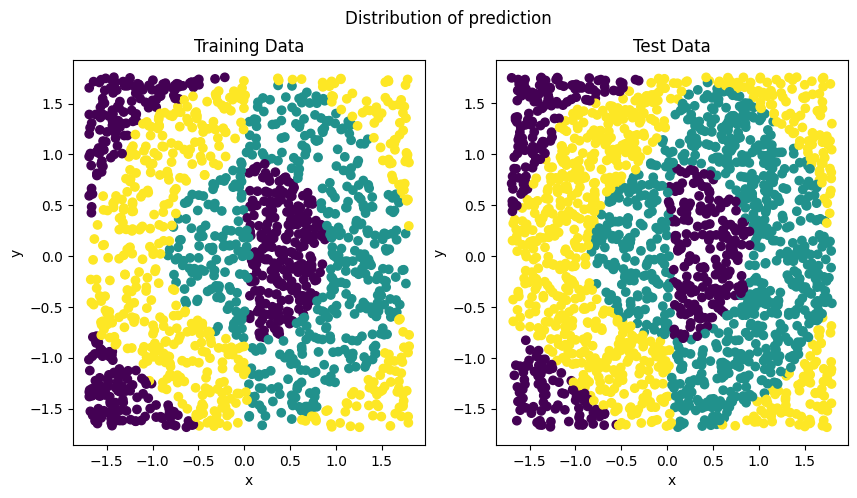

In [50]:
visualize_data_distribution(rings_train, rings_test, "Distribution of prediction", color_by="predicted")

In [139]:
f1_score(rings_train["c"], rings_train["predicted"], average="macro")

0.9773596173237665

In [141]:
f1_score(rings_test["c"], rings_test["predicted"], average="macro")

0.9548083526553631

# easy (0.99 f-score)

In [51]:
easy_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-training.csv"
)
easy_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/easy-test.csv"
)

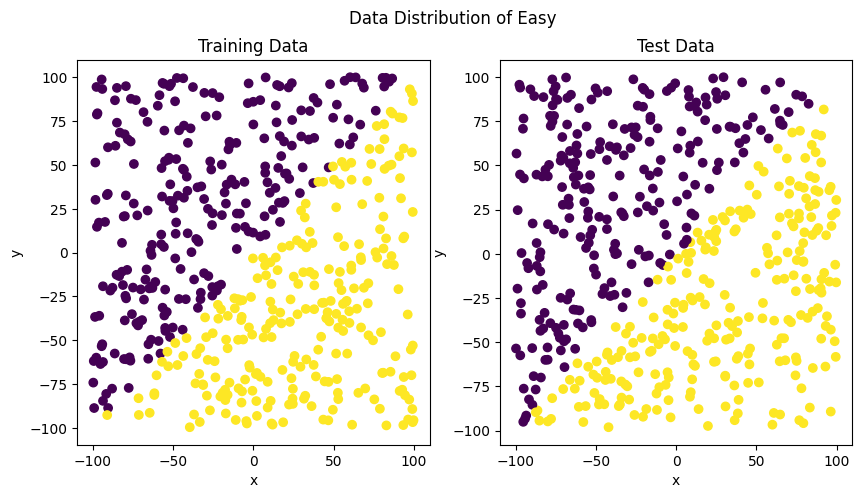

In [63]:
visualize_data_distribution(easy_train, easy_test, "Data Distribution of Easy")

In [53]:
x = easy_train[["x", "y"]].to_numpy()
y = easy_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)

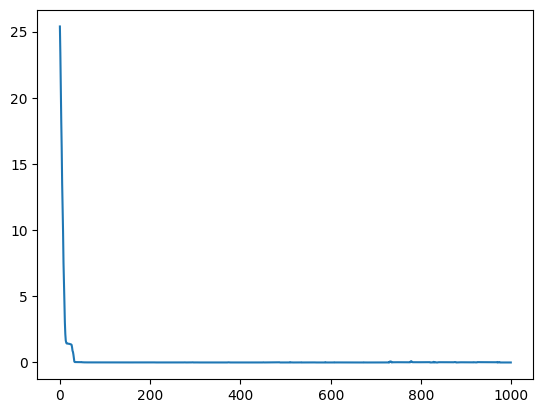

In [55]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 2, "softmax"))

mse = neural.train(x, y, learning_rate=0.001, max_num_epoch=1000)
plt.plot(mse)

In [56]:
easy_train["predicted"] = neural.predict_class(x)
easy_train["correct"] = easy_train["c"] == easy_train["predicted"]

easy_test["predicted"] = neural.predict_class(easy_test[["x", "y"]].to_numpy())
easy_test["correct"] = easy_test["c"] == easy_test["predicted"]

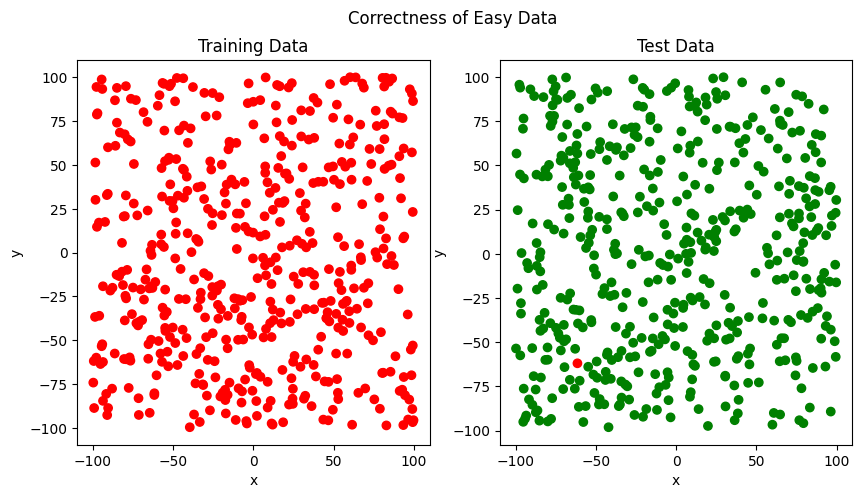

In [57]:
visualize_correctness(easy_train, easy_test, "Correctness of Easy Data")

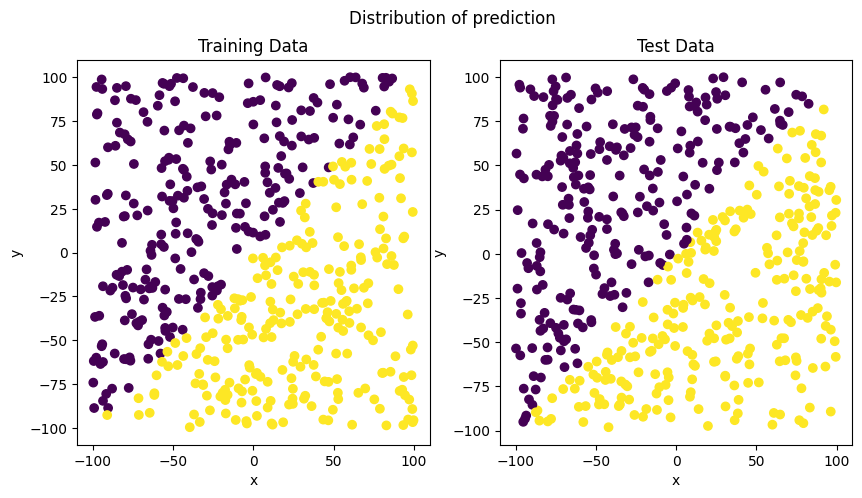

In [58]:
visualize_data_distribution(easy_train, easy_test, "Distribution of prediction", color_by="predicted")

In [140]:
f1_score(easy_train["c"], easy_train["predicted"], average="macro")

1.0

In [142]:
f1_score(easy_test["c"], easy_test["predicted"], average="macro")

0.9979999279974079

# xor3 (0.99 f-score)

In [7]:
xor_train = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-training.csv"
)
xor_test = pd.read_csv(
    "https://raw.githubusercontent.com/nizwant/miowid/main/data/classification/xor3-test.csv"
)
mean = xor_train.mean()
std = xor_train.std()
xor_train[["x", "y"]] = (xor_train[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]
xor_test[["x", "y"]] = (xor_test[["x", "y"]] - mean[["x", "y"]]) / std[["x", "y"]]

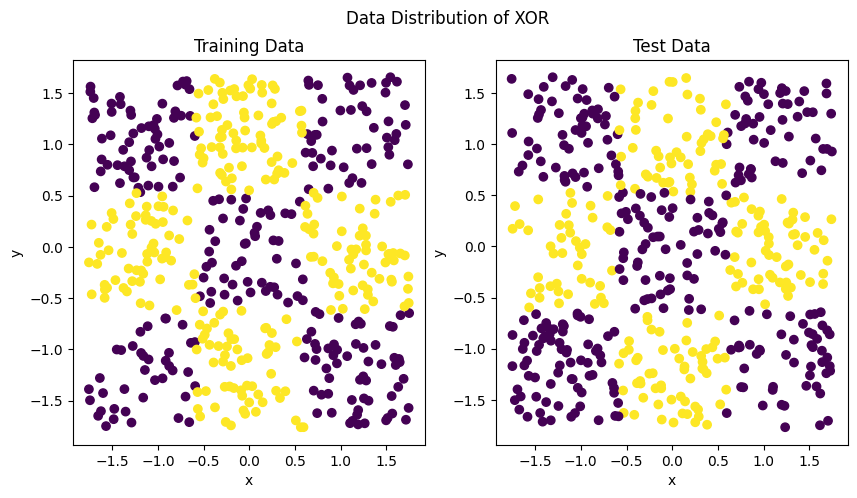

In [148]:
visualize_data_distribution(xor_train, xor_test, "Data Distribution of XOR")

In [8]:
x = xor_train[["x", "y"]].to_numpy()
y = xor_train["c"].to_numpy().reshape(-1, 1)
# one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(y)
y = encoder.transform(y)

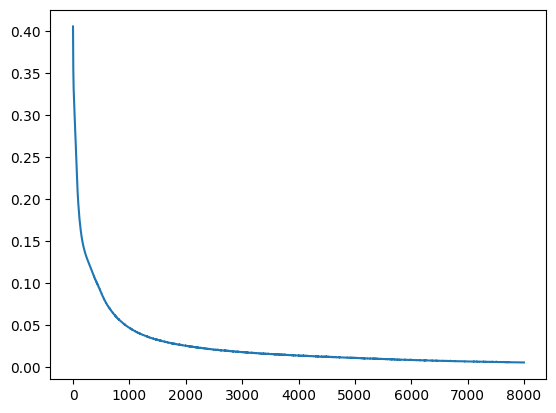

In [641]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu", weight_initialization="normal_xavier"))
neural.add_layer(Layer(10, 10, "relu", weight_initialization="normal_xavier"))
neural.add_layer(Layer(10, 2, "softmax"))

mse = neural.train(x, y, learning_rate=0.0005, max_num_epoch=8000)
plt.plot(mse)

In [643]:
xor_train["predicted"] = neural.predict_class(x)
xor_train["correct"] = xor_train["c"] == xor_train["predicted"]

xor_test["predicted"] = neural.predict_class(xor_test[["x", "y"]].to_numpy())
xor_test["correct"] = xor_test["c"] == xor_test["predicted"]

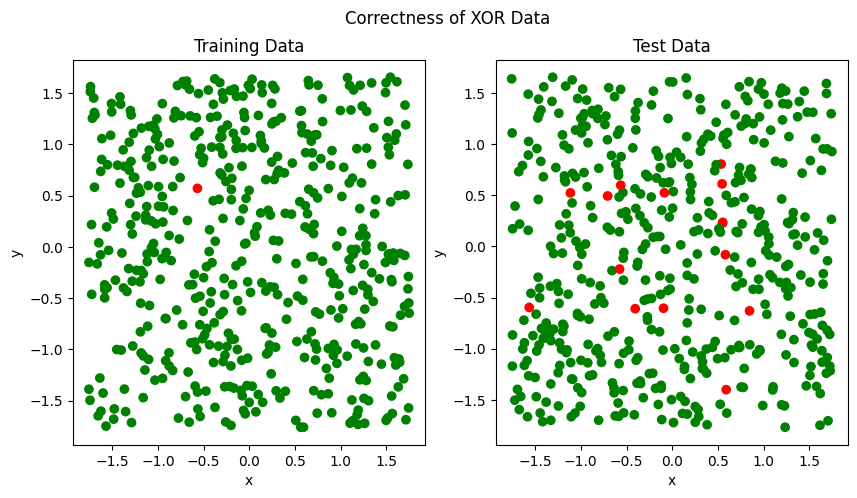

In [644]:
visualize_correctness(xor_train, xor_test, "Correctness of XOR Data")

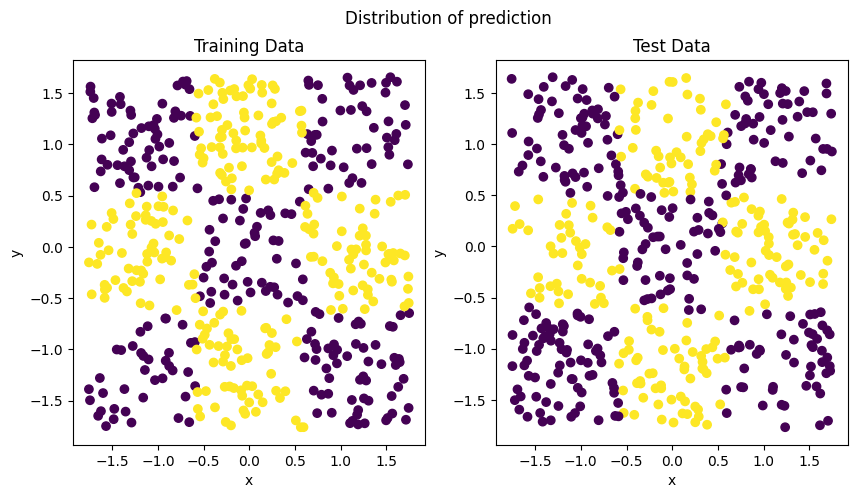

In [645]:
visualize_data_distribution(
    xor_train, xor_test, "Distribution of prediction", color_by="predicted"
)

In [646]:
f1_score(xor_train["c"], xor_train["predicted"])

0.9979959919839679

In [647]:
f1_score(xor_test["c"], xor_test["predicted"])

0.9660194174757282

# comparison of softmax and sigmoid

In [669]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 2, "softmax"))

mse = neural.train(x, y, learning_rate=0.001, max_num_epoch=2000)


neural = NeuralNetwork(cost_function="mse")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 2, "sigmoid"))

mse_2 = neural.train(x, y, learning_rate=0.001, max_num_epoch=2000)

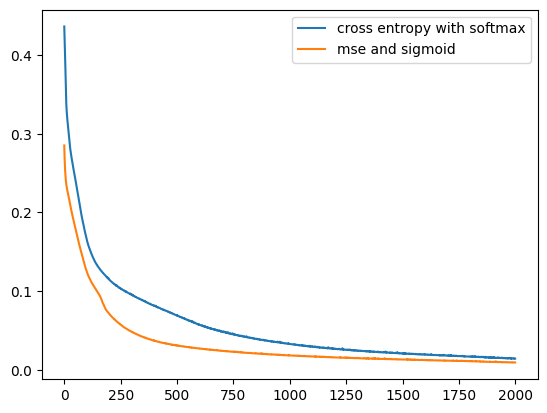

In [671]:
plt.plot(mse, label="cross entropy with softmax")
plt.plot(mse_2, label="mse and sigmoid")
plt.legend()

In [672]:
xor_train["predicted"] = neural.predict_class(x)
xor_train["correct"] = xor_train["c"] == xor_train["predicted"]

xor_test["predicted"] = neural.predict_class(xor_test[["x", "y"]].to_numpy())
xor_test["correct"] = xor_test["c"] == xor_test["predicted"]

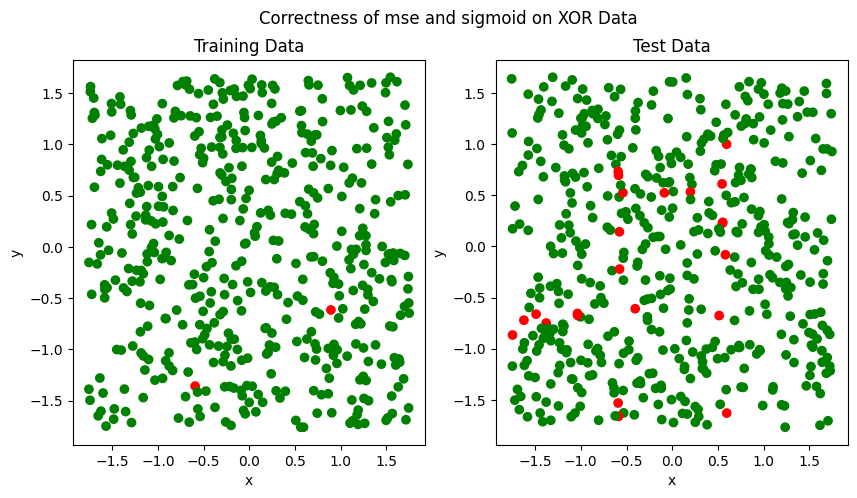

In [673]:
visualize_correctness(xor_train, xor_test, "Correctness of mse and sigmoid on XOR Data")

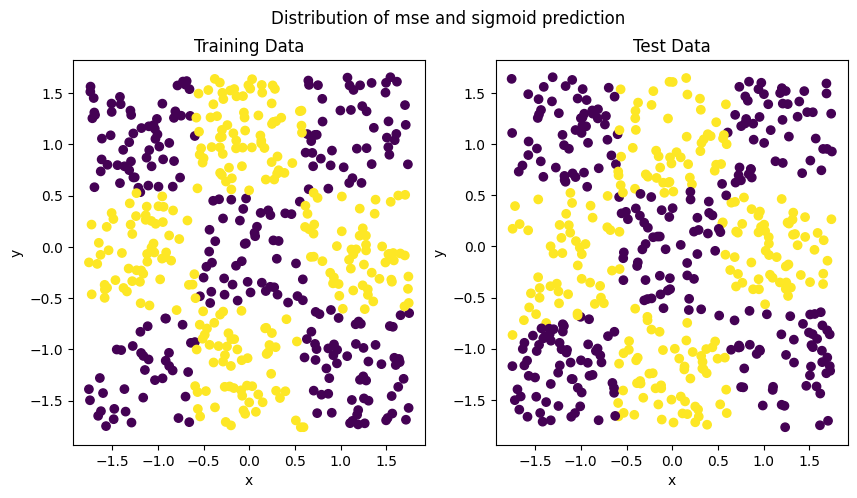

In [674]:
visualize_data_distribution(
    xor_train,
    xor_test,
    "Distribution of mse and sigmoid prediction",
    color_by="predicted",
)

In [13]:
neural = NeuralNetwork(cost_function="cross_entropy_with_softmax")
neural.add_layer(Layer(2, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 10, "relu"))
neural.add_layer(Layer(10, 2, "softmax"))
# neural.visualize_network()

mse = neural.train(x, y, learning_rate=0.001, max_num_epoch=2000)

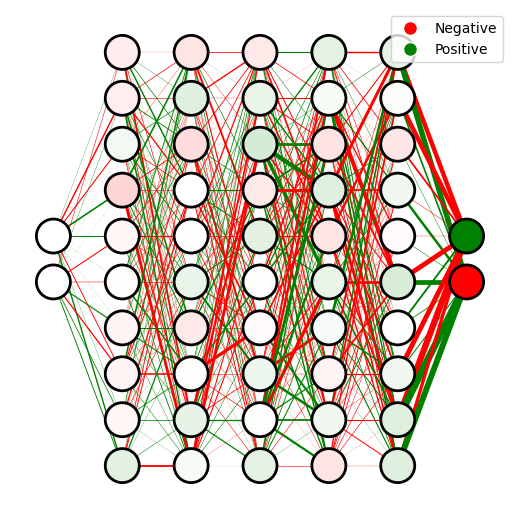

In [15]:
neural.visualize_network()

In [16]:
xor_train["predicted"] = neural.predict_class(x)
xor_train["correct"] = xor_train["c"] == xor_train["predicted"]

xor_test["predicted"] = neural.predict_class(xor_test[["x", "y"]].to_numpy())
xor_test["correct"] = xor_test["c"] == xor_test["predicted"]

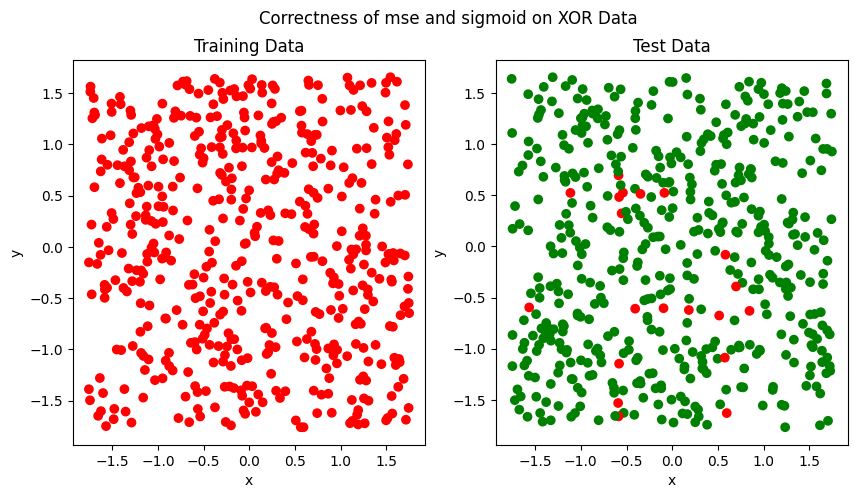

In [17]:
visualize_correctness(xor_train, xor_test, "Correctness of mse and sigmoid on XOR Data")